## 個別的 (#) of post,  (# /  ratio) of post with sharing,  (# / ratio) of post with friend tagging 

In [200]:
import csv

def read(name):
    post_num = 0
    post_share = 0
    post_friend = 0
    
    csvfile = open(name, 'rb')
    for row in csv.reader(csvfile, delimiter=','): 
        post_num += 1
        if row[7] != False:
            post_share += 1
        if row[1] == 'message_tags':
            post_friend += 1
            
    return post_num-1, post_share-1, post_friend

name1 = 'MC_post.csv'
name2 = 'KFC_post.csv'

In [201]:
a = read(name1)
b = read(name2)

print a, b

(1000, 1000, 0) (1000, 1000, 0)


In [202]:
# Chane the format into pandas dataframe
import pandas as pd

df = pd.DataFrame({'number of posts': [a[0],b[0]], 'number of post with sharing': [a[1],b[1]], 'the ratio of post with sharing': [a[1]/a[0], b[1]/b[0]], 'number of post with friend tags': [a[2],b[2]], 'the ratio of post with friend tags': [a[2]/a[0], b[2]/b[0]]})
df.index = ['MC', 'KFC']
print df

     number of post with friend tags  number of post with sharing  \
MC                                 0                         1000   
KFC                                0                         1000   

     number of posts  the ratio of post with friend tags  \
MC              1000                                   0   
KFC             1000                                   0   

     the ratio of post with sharing  
MC                                1  
KFC                               1  


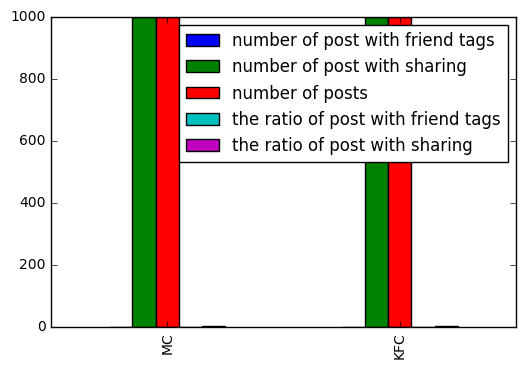

In [203]:
%matplotlib inline
df.plot(kind='bar')

## 各個粉絲頁每月po文的comment變化(max, min, mean)

In [359]:
import pandas as pd

def read2(name):
    time = []
    comment_count = []
    
    csvfile = open(name, 'rb')
    for row in csv.reader(csvfile, delimiter=','): 
        comment_count.append(row[9])
        time.append(row[1])
    
    df = pd.DataFrame({'time' : time, 'number of comment': comment_count})
    df.drop(df.index[0], inplace=True)
    
    return df

name1 = 'MCpost.csv'
name2 = 'KFCpost.csv'

In [360]:
a = read2(name1)
b = read2(name2)

print a['time']

1       2017-01-17T06:00:00+0000
2       2017-01-17T02:00:00+0000
3       2017-01-16T06:00:00+0000
4       2017-01-16T02:00:00+0000
5       2017-01-14T12:00:00+0000
6       2017-01-11T02:00:00+0000
7       2017-01-05T02:00:00+0000
8       2017-01-04T06:00:00+0000
9       2017-01-03T23:00:00+0000
10      2016-12-30T06:00:00+0000
11      2016-12-30T02:00:00+0000
12      2016-12-20T08:00:00+0000
13      2016-12-19T03:16:30+0000
14      2016-12-15T02:00:02+0000
15      2016-12-14T02:00:00+0000
16      2016-12-13T08:00:00+0000
17      2016-12-09T08:00:01+0000
18      2016-12-08T06:15:01+0000
19      2016-12-07T02:00:00+0000
20      2016-12-05T02:00:00+0000
21      2016-12-03T08:00:00+0000
22      2016-12-03T06:00:03+0000
23      2016-12-01T02:00:01+0000
24      2016-11-30T08:00:00+0000
25      2016-11-29T08:00:00+0000
26      2016-11-26T12:00:00+0000
27      2016-11-24T03:07:52+0000
28      2016-11-23T02:00:00+0000
29      2016-11-22T08:00:00+0000
30      2016-11-16T06:00:00+0000
          

In [361]:
import datetime

month = []

for i in range(1,1001):
    data = a['time'][i]
    month.append(datetime.datetime.strptime(data, "%Y-%m-%dT%H:%M:%S+0000").strftime('%m'))

a['time'] = month

print a

     number of comment time
1                   21   01
2                44287   01
3                   55   01
4                   73   01
5                  824   01
6                  376   01
7                  869   01
8                  237   01
9                   23   01
10                1862   12
11                   9   12
12                  30   12
13                  46   12
14                  14   12
15                 177   12
16                   5   12
17                   6   12
18                  21   12
19                 542   12
20                  34   12
21                  35   12
22                   1   12
23                  27   12
24                 111   11
25                   3   11
26                9504   11
27                  10   11
28                  72   11
29                 802   11
30                  44   11
...                ...  ...
971                210   06
972                 33   06
973                 29   06
974                 

In [362]:
month2 = []

for i in range(1,909):
    data = b['time'][i]
    month2.append(datetime.datetime.strptime(data, "%Y-%m-%dT%H:%M:%S+0000").strftime('%m'))

b['time'] = month2

print b

    number of comment time
1                   1   01
2                   9   01
3                  31   01
4                   5   01
5                   1   01
6                3306   01
7                 337   01
8                 136   01
9                  14   01
10                 31   12
11                 33   12
12                216   12
13                  5   12
14                154   12
15                 55   12
16                 22   12
17                  7   12
18                 27   12
19                  6   12
20                 16   12
21                  2   12
22                 36   12
23                 27   12
24                 41   12
25                 73   12
26                  4   12
27                213   12
28                616   12
29               9038   12
30                 80   12
..                ...  ...
879                26   12
880                10   12
881                22   12
882                18   12
883                20   12
8

In [371]:
def valuefind(dataframe):
    
    m = ['01','02','03','04','05','06','07','08','09','10','11','12']
    dataframe['number of comment'] = pd.to_numeric(dataframe['number of comment'], errors='coerce').fillna(0)
    
    maxv = []
    minv = []
    meanv = []
    
    for i in m:
        data = dataframe[dataframe['time'] == i]
        maxv.append(data['number of comment'].max())
        minv.append(data['number of comment'].min())
        meanv.append(data['number of comment'].mean())
    
    table = pd.DataFrame({'month': m, 'max value': maxv, 'min value': minv, 'mean': meanv})
    
    return table

    max value        mean  min value month
0       44287  881.682353          4    01
1         762  124.542373          3    02
2        2706  203.393939          0    03
3        1549  126.247191          0    04
4       13864  265.975309          4    05
5        4671  205.353535          4    06
6        8509  379.666667          1    07
7        5053  363.132530          0    08
8         901  109.346667          6    09
9        3838  180.219178          2    10
10       9504  304.644737          0    11
11       4104  226.085106          0    12


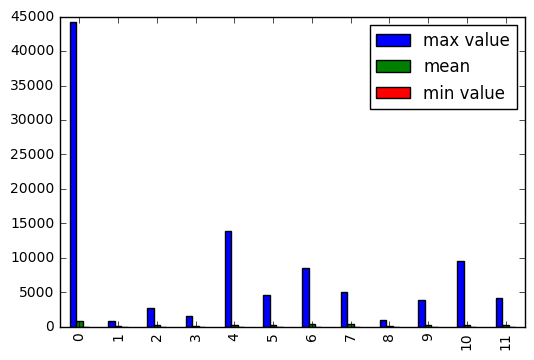

In [374]:
MC = valuefind(a)
KFC = valuefind(b)

print MC

MC.plot(kind = 'bar')

    max value        mean  min value month
0        3306  101.726415          0    01
1         488   33.917526          0    02
2        1976   74.920000          0    03
3        1844  156.857143          0    04
4        2532   85.609375          0    05
5        2551  111.081633          0    06
6         791   51.366667          0    07
7         497   50.103896          0    08
8         314   26.939655          0    09
9         522   56.838710          0    10
10        870   77.130435          0    11
11       9038  175.262136          0    12


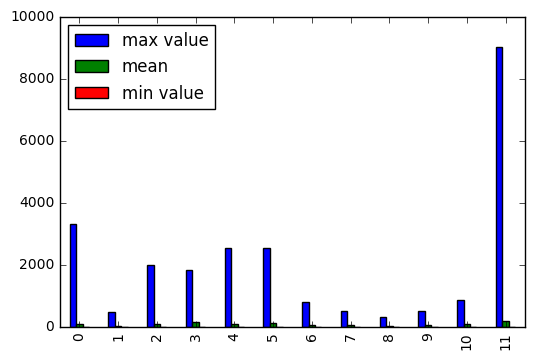

In [375]:
print KFC

KFC.plot(kind = 'bar')

## Analysis  1

In [439]:
import pandas as pd

def query(name):
    types = []
    comment_count = []
    like_count = []
    share_count = []
    
    csvfile = open(name, 'rb')
    for row in csv.reader(csvfile, delimiter=','):
        comment_count.append(row[14])    
        share_count.append(row[7])
        like_count.append(row[10])
        types.append(row[4])
    
    df = pd.DataFrame({'post type':types, 'number of likes': like_count, 'number of shares': share_count, 'number of comment': comment_count})
    df.drop(df.index[0], inplace=True)
    
    df['number of comment'] = pd.to_numeric(df['number of comment'], errors='coerce').fillna(0)
    df['number of likes'] = pd.to_numeric(df['number of likes'], errors='coerce').fillna(0)
    df['number of shares'] = pd.to_numeric(df['number of shares'], errors='coerce').fillna(0)
    
    comment_max = df['number of comment'].max()
    comment_type = df[df['number of comment'] == comment_max]
    like_max = df['number of likes'].max()
    like_type = df[df['number of likes'] == like_max]
    share_max = df['number of shares'].max()
    share_type = df[df['number of shares'] == share_max]
    return comment_max, comment_type, like_max, like_type, share_max, share_type

name1 = 'C:\\Users\\Jennifer\\Desktop\\Social Media Final\\all data\\MC_post.csv'
name2 = 'C:\\Users\\Jennifer\\Desktop\\Social Media Final\\all data\\KFC_post.csv'

In [440]:
res1 = query(name1)

print res1[0]

print res1[1]

print res1[2]

print res1[3]

print res1[4]

print res1[5]

36456.0
     number of comment  number of likes  number of shares post type
2              36456.0          63190.0           62405.0     photo
103            36456.0          63190.0           62405.0     photo
204            36456.0          63190.0           62405.0     photo
196867.0
      number of comment  number of likes  number of shares post type
1057             1289.0         196867.0           21772.0     photo
243246.0
     number of comment  number of likes  number of shares post type
557                0.0              0.0          243246.0     video


In [441]:
res2 = query(name2)

print res2[0]

print res2[1]

print res2[2]

print res2[3]

print res2[4]

print res2[5]

2551.0
     number of comment  number of likes  number of shares post type
124             2551.0           7308.0            3433.0     photo
32709.0
     number of comment  number of likes  number of shares post type
104              361.0          32709.0             343.0     photo
24963.0
    number of comment  number of likes  number of shares post type
14                0.0              0.0           24963.0     photo


## Analysis 2

In [461]:
import numpy as np

def KFCmostcomment(name):
    comment = []
    message = []
    ids = []
    
    csvfile = open(name, 'rb')
    for row in csv.reader(csvfile, delimiter=','): 
        ids.append(row[6])
        comment.append(row[13])
        
    df = pd.DataFrame({'id':ids, 'number of comment': comment})
    df.drop(df.index[0], inplace=True)      
    top = np.argsort(df['number of comment'])[::-1][:10]
    return df
    
name = 'C:\\Users\\Jennifer\\Desktop\\Social Media Final\\all data\\KFC_post.csv'

In [462]:
KFCmostcomment(name)

,id,number of comment
1,324273577645211_1434862036586354,0
2,324273577645211_1452419758163915,9
3,324273577645211_1447977611941463,30
4,324273577645211_1434860893253135,5
5,324273577645211_1440722726000285,1
6,324273577645211_1439574736115084,3173
7,324273577645211_1432622743476950,329
8,324273577645211_1439495902789634,136
9,324273577645211_1439631042776120,14
10,324273577645211_1416759075063317,31
